# Simple Linear Regression Model 






In [1]:
# Importing libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Reading csv File 
data = pd.read_csv('/kaggle/input/linear-regression-dataset/Linear Regression - Sheet1.csv')
data.head()

print(" Dataset shape : ",data.shape)
print(" X shape : ",data['X'].shape)
print(" Y shape : ",data['Y'].shape)

 Dataset shape :  (300, 2)
 X shape :  (300,)
 Y shape :  (300,)


In [3]:
#  defining X_train , Y_train , X_test and Y_test Variables for Model 

X = data['X'].values.reshape(-1, 1)
Y = data['Y'].values.reshape(-1, 1)

print(X.shape)
print(Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X ,Y , test_size=0.25,random_state=101)

print(" X train shape : ",X_train.shape)
print(" Y train shape : ",Y_train.shape)

print(" X test shape : ",X_test.shape)
print(" Y test shape : ",Y_test.shape)

(300, 1)
(300, 1)
 X train shape :  (225, 1)
 Y train shape :  (225, 1)
 X test shape :  (75, 1)
 Y test shape :  (75, 1)


In [4]:
# defining Class LinearRegression to Train Model 

class LinearRegression:
    
    # initializing object's attributes using __init__ function
    
    def __init__(self,learning_rate=0.00005,epochs=100):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None 
        self.bias = None
        
    # Fit function is used to Train model 
    
    def fit(self,X_train,Y_train):
        no_ex , no_features = X_train.shape
#         print(no_ex)
#         print(no_features)
#         initalizing weights and bias parameter
        self.weights = np.zeros((no_features,1))
        self.bias = 0
#         Y_train = Y_train.reshape(-1,1)
         
#         formula for gradient decent 
        for _ in range(self.epochs):
            pre_Y = np.dot(X_train, self.weights) + self.bias
            
#             computation
            dw = (1/no_ex)*np.dot(X_train.T,(pre_Y - Y_train))
            db = (1/no_ex)*np.sum(pre_Y - Y_train)
            
#             updating weights and bias 
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    # predict function predicts the value of dependent variable(Y)
    
    def predict(self,X_test):
        return np.dot(X_test,self.weights) + self.bias

In [5]:
# creating object LinearRegression class 

model = LinearRegression()

#calling fit function to train model
model.fit(X_train,Y_train)

#calling predict function to predict the value of Y
V = model.predict(X_test)
# print(Y)

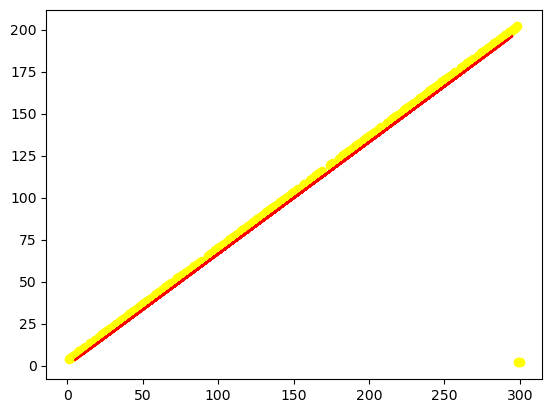

In [6]:
plt.scatter(X_train,Y_train,color='yellow')
plt.plot(X_test,V,color='red')
plt.show()